In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online.csv')

In [3]:
df.shape

(12330, 18)

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

- Exit Rate - współczynnik wyświetleń które zakończyły się na tej podstronie
- Bounce Rate - współczynnik bezpośrednich wejść na stronę i zakończenie wyszukiwania na nich
- SpecialDay - OneHot?
- Region - OneHot?
- SpecialDay - prwie wszystkie są w Maju

In [5]:
df.PageValues.unique()

array([ 0.        , 54.17976426, 19.44707913, ..., 78.81172527,
        3.68540082, 12.24171745])

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [30]:
df[(df.Administrative_Duration == 0) & (df.Informational_Duration == 0) & (df.ProductRelated_Duration == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,Revenue,Administrative_Durationlog,Informational_Durationlog,ProductRelated_Durationlog,PageValueslog,Administrative_Duration_log,Informational_Duration_log,ProductRelated_Duration_log,PageValues_log
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,...,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,0,0.0,0,0.0,3,0.0,0.2,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12200,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12220,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12301,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
all([df.Administrative_Duration == 0, df.Informational_Duration == 0, df.ProductRelated_Duration == 0])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.apply(lambda x: len(pd.unique(x)), axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

[]

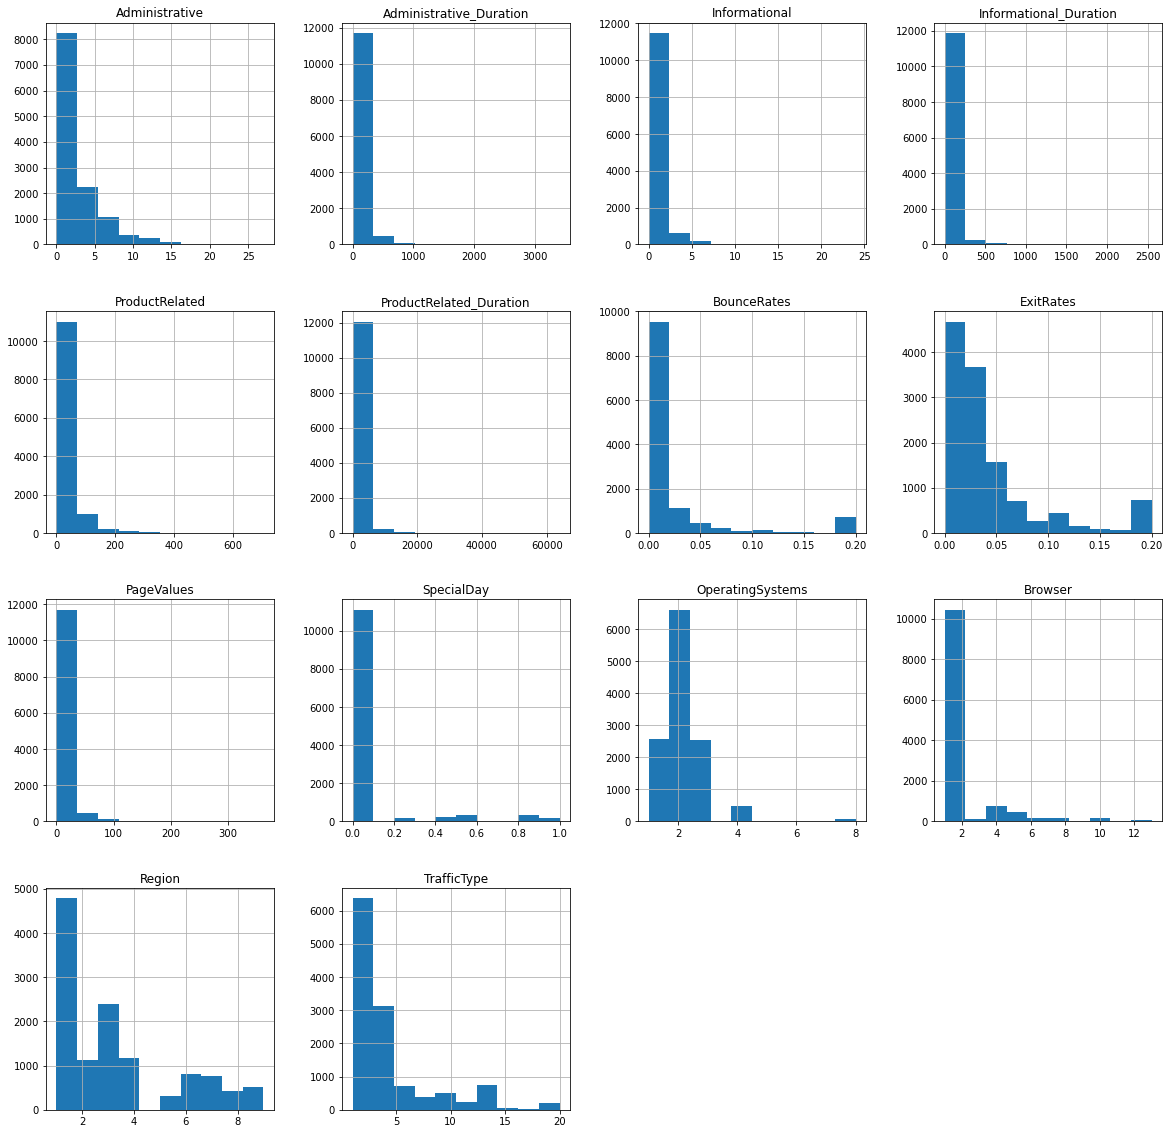

In [9]:
df.hist(figsize=(20,20))
plt.plot()

<AxesSubplot:>

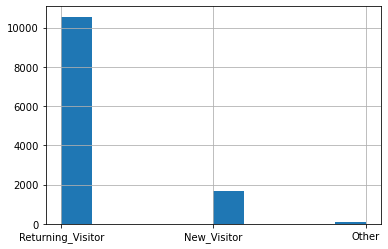

In [10]:
df.VisitorType.hist()

<AxesSubplot:>

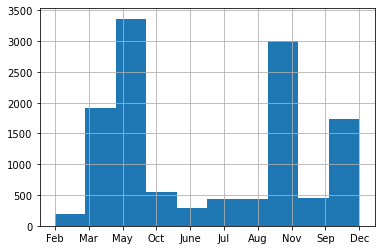

In [11]:
df.Month.hist()

In [12]:
df.groupby('Weekend', axis=0).agg(lambda x: sum(x)/np.mean(x))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
Weekend,,,,,,,,,,,,,,,
False,9462,9462.0,9462,9462.0,9462,9462.0,9462.0,9462.0,9462.0,9462.0,9462,9462,9462,9462,9462.0
True,2868,2868.0,2868,2868.0,2868,2868.0,2868.0,2868.0,2868.0,2868.0,2868,2868,2868,2868,2868.0


In [32]:
9400/5

1880.0

In [31]:
2868/2

1434.0

In [14]:
df.groupby('Revenue', axis=0).agg(lambda x: sum(x)/np.mean(x))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,10422,10422.0,10422.0,10422.0,10422,10422.0,10422.0,10422.0,10422.0,10422.0,10422,10422,10422.0,10422,10422.0
True,1908,1908.0,1908.0,1908.0,1908,1908.0,1908.0,1908.0,1908.0,1908.0,1908,1908,1908.0,1908,1908.0


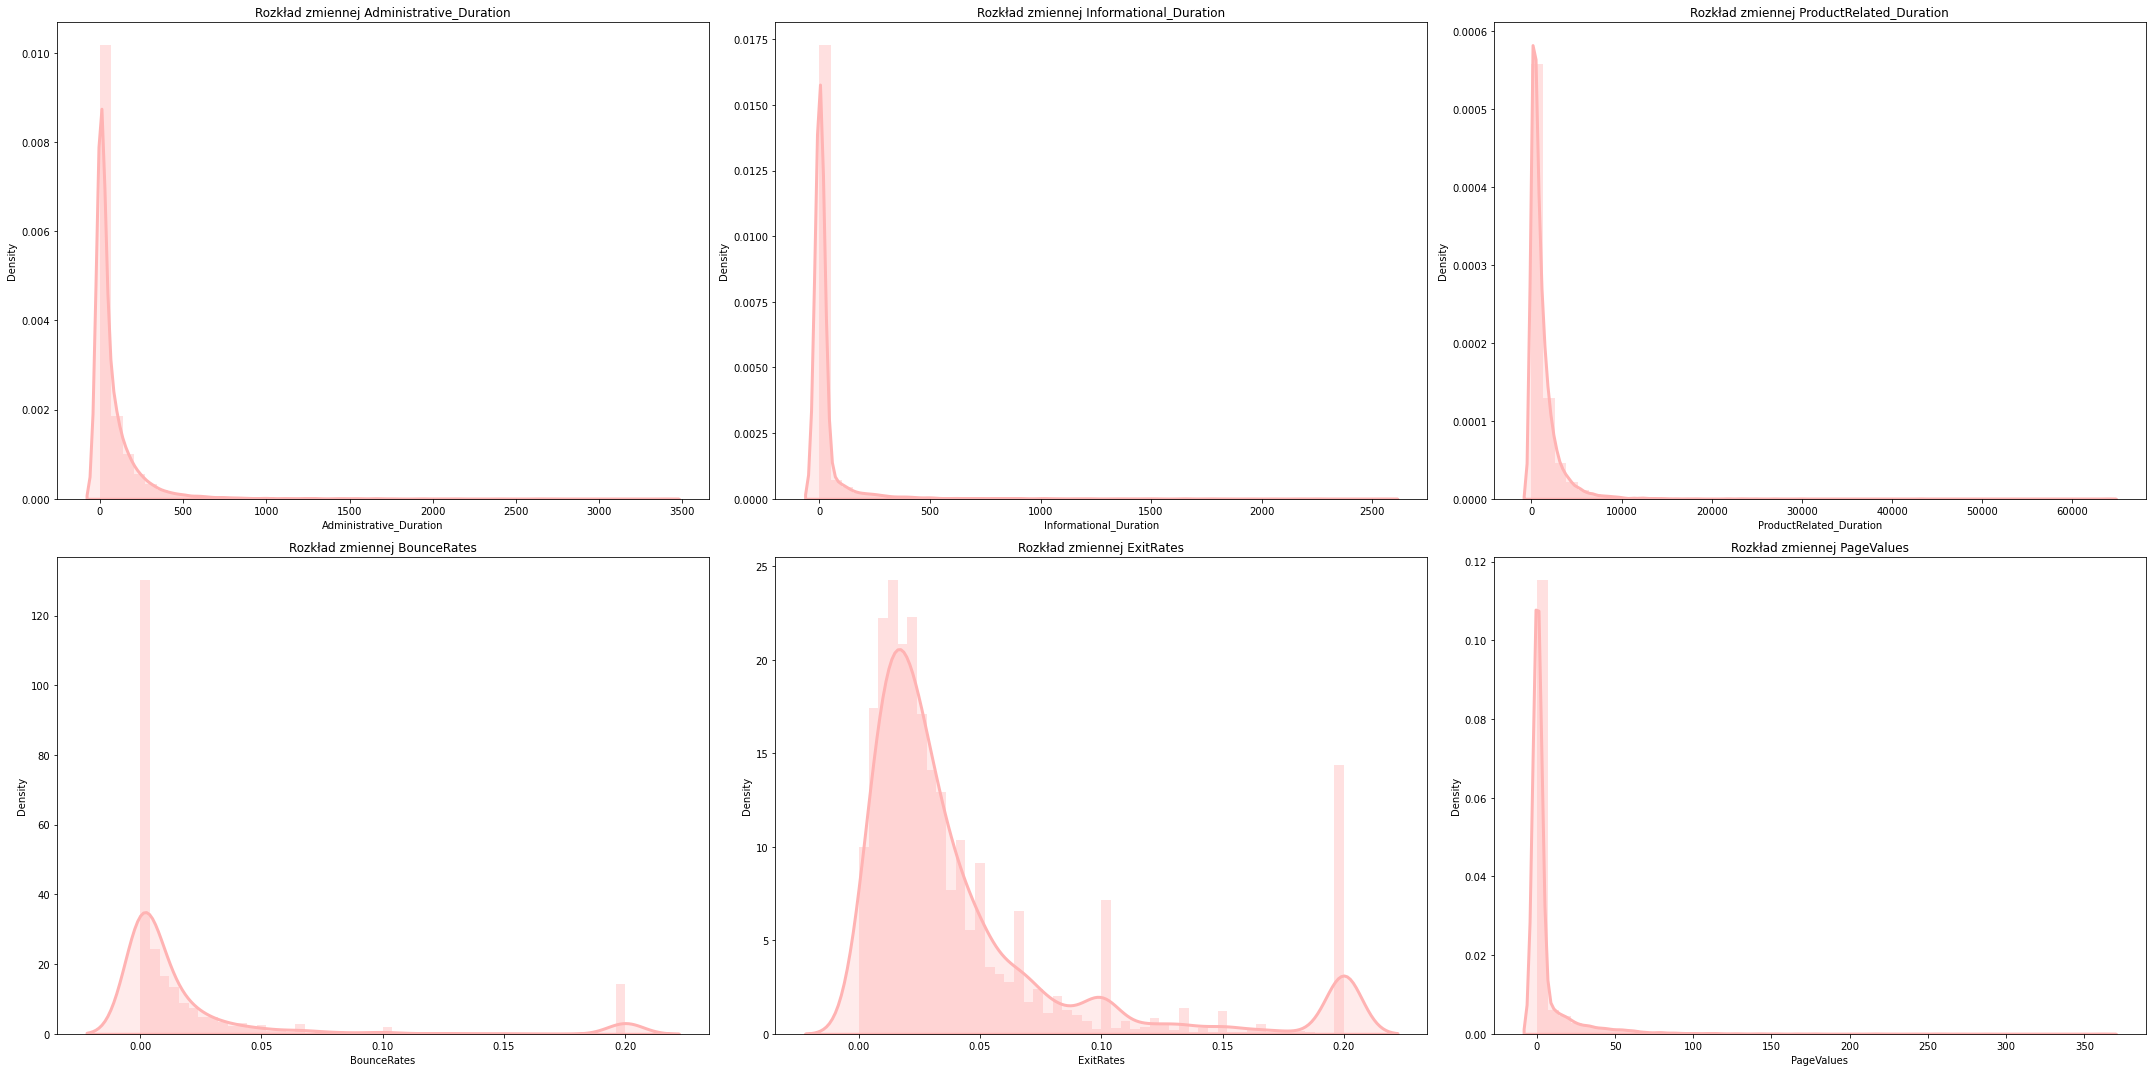

In [17]:
variables=['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

#variables=['Administrative','Administrative_Duration','Informational', 'Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#variables=df.columns.values
f, axes = plt.subplots(2, 3, figsize=(30, 15))

for i in range(0, len(variables)):
    sns.distplot(df[variables[i]], hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i//3, i%3], color='#ffb3b3').set_title('Rozkład zmiennej '+ variables[i])
plt.tight_layout();

In [13]:
variables=['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration','PageValues']
for i in variables:
    df[i + '_log'] = df[i].apply(lambda x: math.log(x+1))

In [16]:
variables + "_log"

TypeError: can only concatenate list (not "str") to list

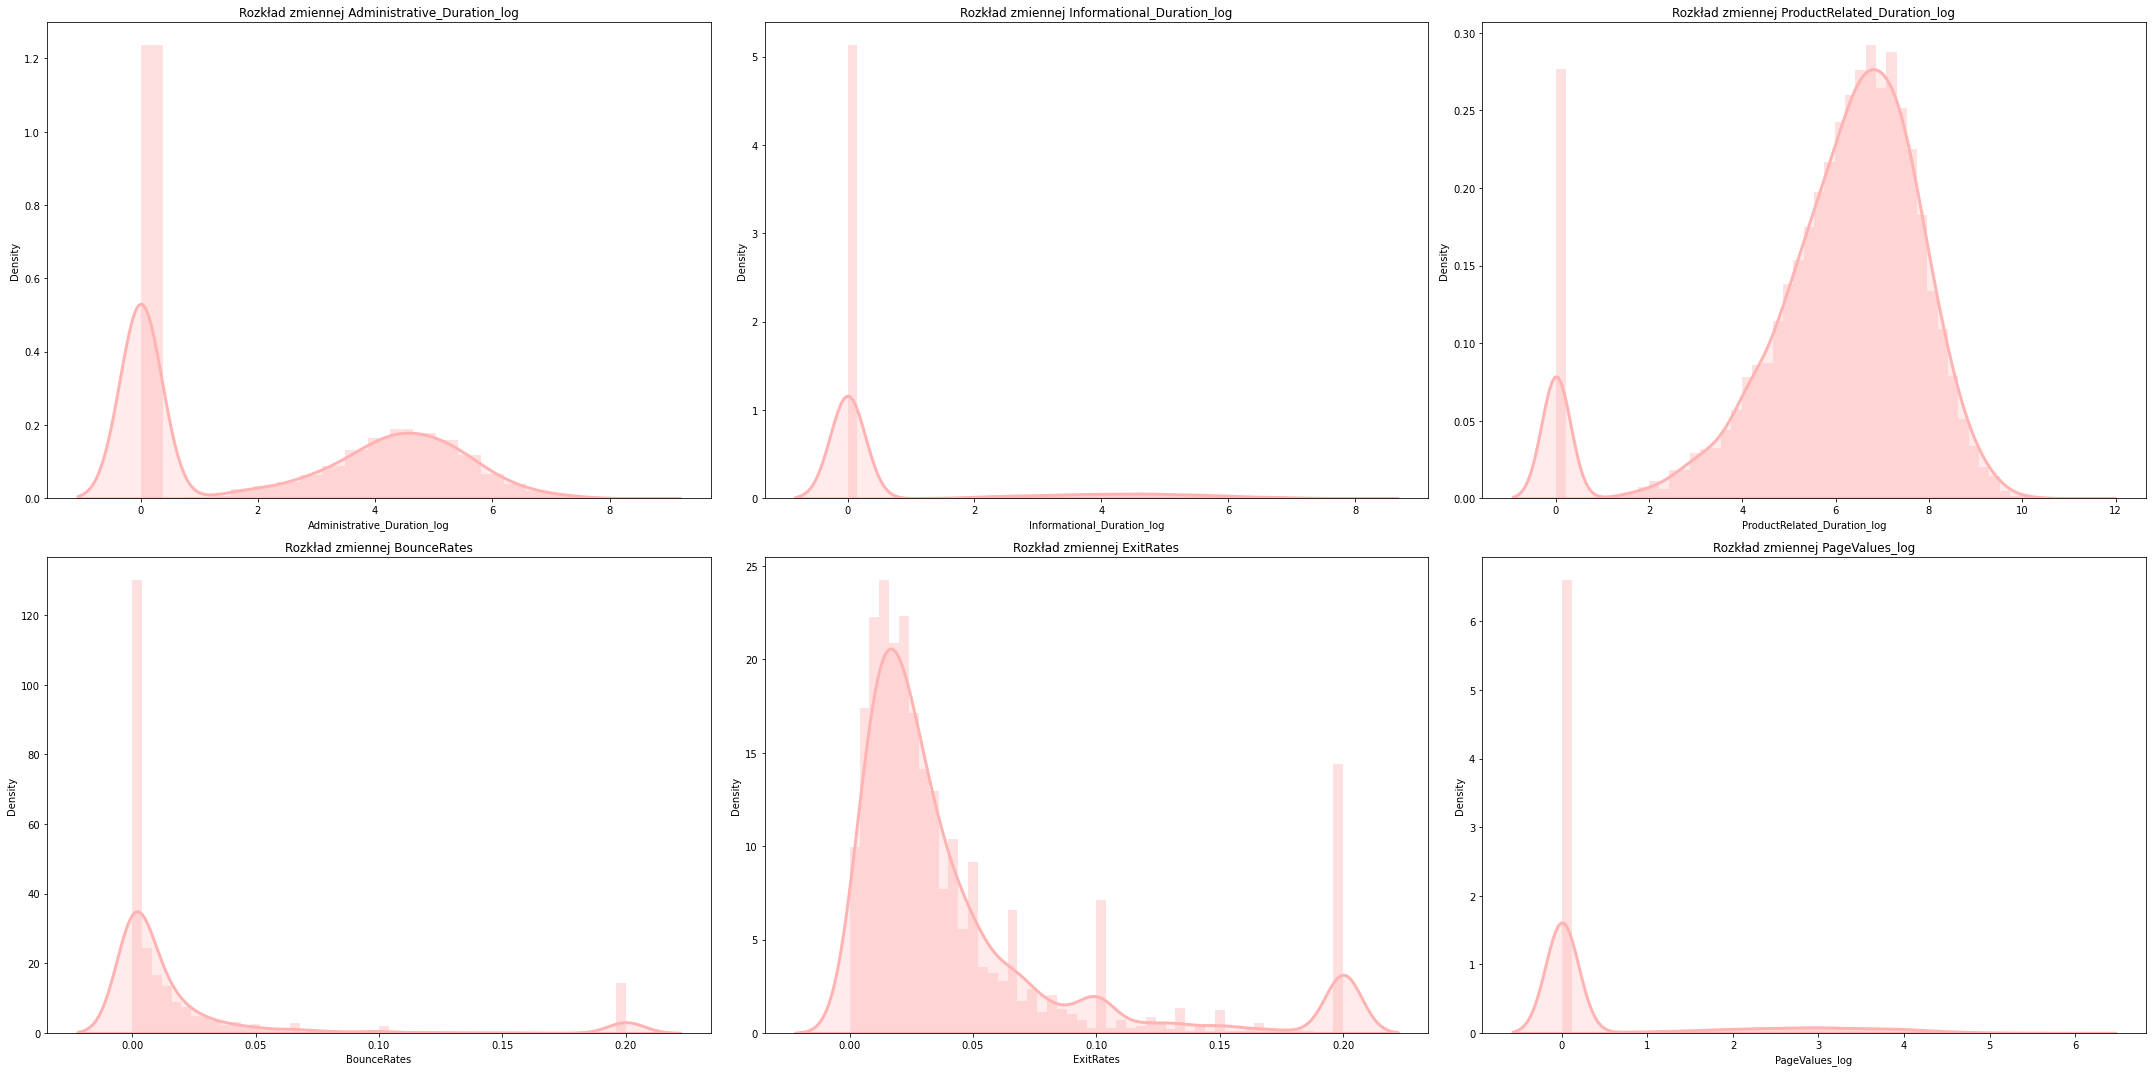

In [19]:
variables=['Administrative_Duration_log', 'Informational_Duration_log','ProductRelated_Duration_log','BounceRates','ExitRates','PageValues_log']

f, axes = plt.subplots(2, 3, figsize=(30, 15))

for i in range(0, len(variables)):
    sns.distplot(df[variables[i]], hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i//3, i%3], color='#ffb3b3').set_title('Rozkład zmiennej '+ variables[i])
plt.tight_layout();

<AxesSubplot:>

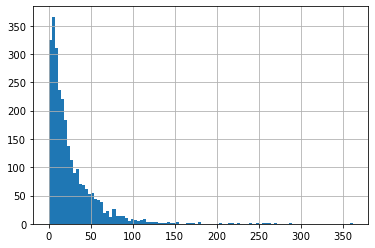

In [17]:
df.PageValues[df.PageValues != 0.0].hist(bins=100)


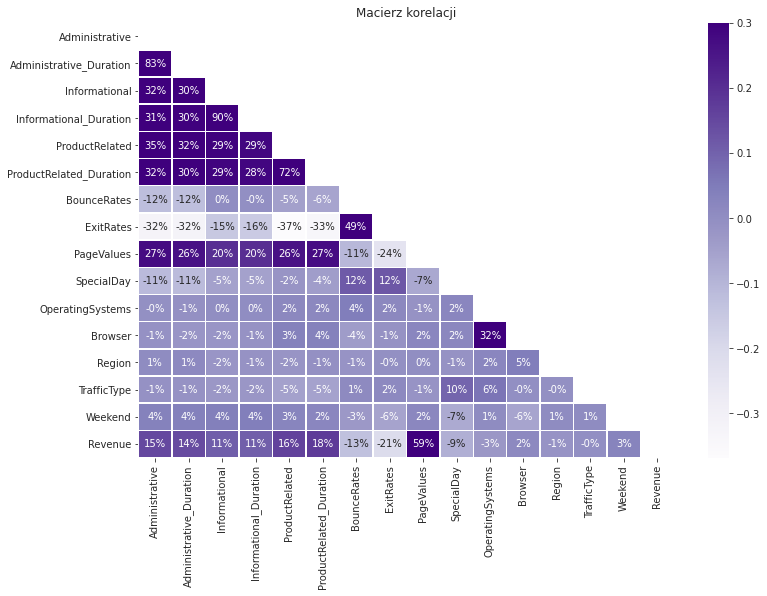

In [13]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('ticks'):
    f, ax = plt.subplots(figsize=(12,8))
    ax = sns.heatmap(df.corr(method ='kendall'), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False,cmap='Purples')
    plt.title('Macierz korelacji')

In [12]:
df.groupby(['SpecialDay', 'Month']).agg('count')

Administrative  Administrative_Duration  Informational  \
SpecialDay Month                                                           
0.0        Aug               433                      433            433   
           Dec              1727                     1727           1727   
           Feb               105                      105            105   
           Jul               432                      432            432   
           June              288                      288            288   
           Mar              1907                     1907           1907   
           May              2192                     2192           2192   
           Nov              2998                     2998           2998   
           Oct               549                      549            549   
           Sep               448                      448            448   
0.2        Feb                15                       15             15   
           May               163                      163            163   
0.4        Feb                21                       21             21   
           May               222                      222            222   
0.6        Feb                19                       19             19   
           May               332                      332            332   
0.8        Feb                19                       19             19   
           May               306                      306            306   
1.0        Feb                 5                        5              5   
           May               149                      149            149   

                  Informational_Duration  ProductRelated  \
SpecialDay Month                                           
0.0        Aug                       433             433   
           Dec                      1727            1727   
           Feb                       105             105   
           Jul                       432             432   
           June                      288             288   
           Mar                      1907            1907   
           May                      2192            2192   
           Nov                      2998            2998   
           Oct                       549             549   
           Sep                       448             448   
0.2        Feb                        15              15   
           May                       163             163   
0.4        Feb                        21              21   
           May                       222             222   
0.6        Feb                        19              19   
           May                       332             332   
0.8        Feb                        19              19   
           May                       306             306   
1.0        Feb                         5               5   
           May                       149             149   

                  ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
SpecialDay Month                                                                
0.0        Aug                        433          433        433         433   
           Dec                       1727         1727       1727        1727   
           Feb                        105          105        105         105   
           Jul                        432          432        432         432   
           June                       288          288        288         288   
           Mar                       1907         1907       1907        1907   
           May                       2192         2192       2192        2192   
           Nov                       2998         2998       2998        2998   
           Oct                        549          549        549         549   
           Sep                        448          448        448         448   
0.2        Feb                         15           

In [35]:
k = df[['Administrative', 'Region']].groupby(['Region']).agg('count')

<BarContainer object of 9 artists>

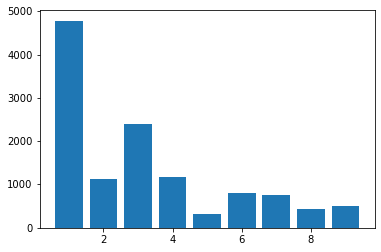

In [40]:
plt.bar(data = k,x=k.index, height=k.Administrative)

In [51]:
k2 = df[['Administrative', 'Region', 'Revenue']].groupby(['Region', 'Revenue']).agg('count')
k2.reset_index(inplace=True)

<AxesSubplot:xlabel='Region', ylabel='Administrative'>

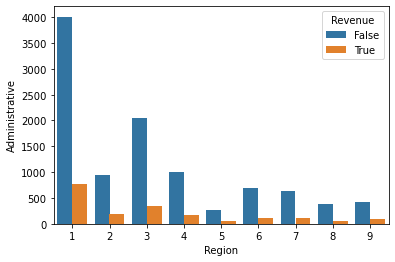

In [52]:
sns.barplot(data=k2, x='Region', y='Administrative', hue='Revenue')

In [47]:
sns.barplot(data=k2, x='')

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   